# Working with Images with GPT

In [1]:
# %pip install -q -r requirements.txt

In [2]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [3]:
load_dotenv('test.env')

True

In [4]:
openai_api_key = os.getenv("OPENAI_API_KEY")
gpt = ChatOpenAI(model='gpt-4')

In [11]:
sample_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/2880px-Tsunami_by_hokusai_19th_century.jpg'

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Tsunami_by_hokusai_19th_century.jpg/2880px-Tsunami_by_hokusai_19th_century.jpg" width="400">


In [5]:
# Tracing
tracing = os.getenv("LANGCHAIN_TRACING_V2")
langsmith = os.getenv("LANGCHAIN_API_KEY")

In [13]:
from langchain.schema import HumanMessage, SystemMessage

system_message = SystemMessage(content="You are a very critical art connoisseur who specializes in historical artworks")
user_message = HumanMessage(content="What is this painting about?")
image_message = HumanMessage(content=f"Image URL: {sample_image_url}")

response = gpt(messages=[system_message, user_message, image_message], max_tokens=4000)

print(response.content)

The painting you are referring to is "The Great Wave off Kanagawa," a famous woodblock print by the Japanese ukiyo-e artist Katsushika Hokusai. It is also known as simply "The Wave" and is the first print in Hokusai's series "Thirty-Six Views of Mount Fuji."

The painting depicts a great rogue wave threatening boats off the coast of the town of Kanagawa (modern-day Yokohama, Kanagawa Prefecture). While the wave is the focal point, the mountain in the background is Mount Fuji, a significant symbol of Japan. 

The contrast between the transient, violent wave and the eternal, serene Mount Fuji is a focal point of this artwork. The wave symbolizes the ebbs and flows of life, while Fuji represents the unchanging aspect of existence, underscoring the Buddhist philosophical perspective.

The intense detail and strong colors demonstrate Hokusai's masterful technique and ability to convey motion and intensity. Despite its apparent simplicity, the artwork is rich with symbolic and cultural nuanc

In [14]:
print(response)

content='The painting you are referring to is "The Great Wave off Kanagawa," a famous woodblock print by the Japanese ukiyo-e artist Katsushika Hokusai. It is also known as simply "The Wave" and is the first print in Hokusai\'s series "Thirty-Six Views of Mount Fuji."\n\nThe painting depicts a great rogue wave threatening boats off the coast of the town of Kanagawa (modern-day Yokohama, Kanagawa Prefecture). While the wave is the focal point, the mountain in the background is Mount Fuji, a significant symbol of Japan. \n\nThe contrast between the transient, violent wave and the eternal, serene Mount Fuji is a focal point of this artwork. The wave symbolizes the ebbs and flows of life, while Fuji represents the unchanging aspect of existence, underscoring the Buddhist philosophical perspective.\n\nThe intense detail and strong colors demonstrate Hokusai\'s masterful technique and ability to convey motion and intensity. Despite its apparent simplicity, the artwork is rich with symbolic a

In [16]:
print(response.usage_metadata)

{'input_tokens': 81, 'output_tokens': 247, 'total_tokens': 328, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}



### Example Response

`-- Your response may be different`

This is a classic piece of Japanese art known as "The Great Wave off Kanagawa," which is part of the series "Thirty-six Views of Mount Fuji" by the esteemed ukiyo-e artist Katsushika Hokusai. As a critical connoisseur, I must note the remarkable composition and bold use of color that makes this woodblock print an iconic masterpiece of art history.

The painting captures an enormous wave threatening boats near the Japanese prefecture of Kanagawa. Although it appears to be a menacing wave, the composition cleverly situates Mount Fuji in the background, which is dwarfed in size by the wave but stands resolute and immovable, symbolizing the enduring power of nature and possibly also the spirit of Japan.

Hokusai's genius is evident in the dynamic curvature of the wave and the foamy tendrils that almost resemble clawed fingers, conjuring a visceral response from the viewer as if one can almost feel the drop in the stomach that accompanies a ship at the mercy of the ocean's might.

The intricacy with which he has depicted the waves and the delicate details of the foam against the simple elegance of Mount Fuji contributes to a contrast that is both dramatic and tranquil, a duality that defines the relationship between humanity and nature.


-----------------
You can also send a local image to the API, it requires some transformations

Generating Images with Dall-E over the API




In [14]:
# %pip install pillow
# For PIL library

In [1]:
import os
import requests
from PIL import Image
import json

In [6]:
# %pip install openai

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from openai import OpenAI

# Set your OpenAI API key from environment variables
openai_api_key = os.getenv("OPENAI_API_KEY")

# Initialize the OpenAI client (directly, as image generation is outside the scope of LangChain's chat model)
client = OpenAI(api_key=openai_api_key)

# Define parameters for the image generation
model = "dall-e-3"
prompt = "shinto shrine in the middle of the lake with fuji in the background in autumn"
n = 1
size = "1024x1024"
quality = "standard"
style = "vivid"

# Generate image using the OpenAI API
response = client.images.generate(
    model=model,
    prompt=prompt,
    n=n,
    size=size,
    quality=quality,
    style=style
)

response

In [9]:
# Extract the generated image URL from the response
json_response = json.loads(response.model_dump_json())

In [10]:
json_response

{'created': 1729553018,
 'data': [{'b64_json': None,
   'revised_prompt': 'A serene scene of a traditional Shinto shrine, placed serenely in the center of a tranquil lake. The calm waters mirror the intricate structure of the oriental building, reflecting its elaborate details. In the distance, the majestic Mount Fuji proudly ascends the horizon, its snow-capped peak against the bright autumn sky. The foreground is awash with the vibrant hues of fall, as a carpet of red, orange, and gold foliage lines the lake. The air is filled with serenity and a sense of timeless spirituality.',
   'url': 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-2aZNnpvzLOPAE2JYFu3pKlYc/user-IgofdTeb0p5OL4QPxoVAFfOH/img-2rEdyv1F11pAj0Z0jqYwOVAE.png?st=2024-10-21T22%3A23%3A38Z&se=2024-10-22T00%3A23%3A38Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-21T18%3A49%3A42Z&ske=2024-10-22T18%3A49%3A42Z

In [11]:
# Set the directory for the stored image
image_dir = os.path.join(os.curdir, 'media')

# Initialize the image path (note the filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Retrieve the generated image
image_url = json_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

In [12]:
# Display the image in the default image viewer
image = Image.open(image_path)
image.show()

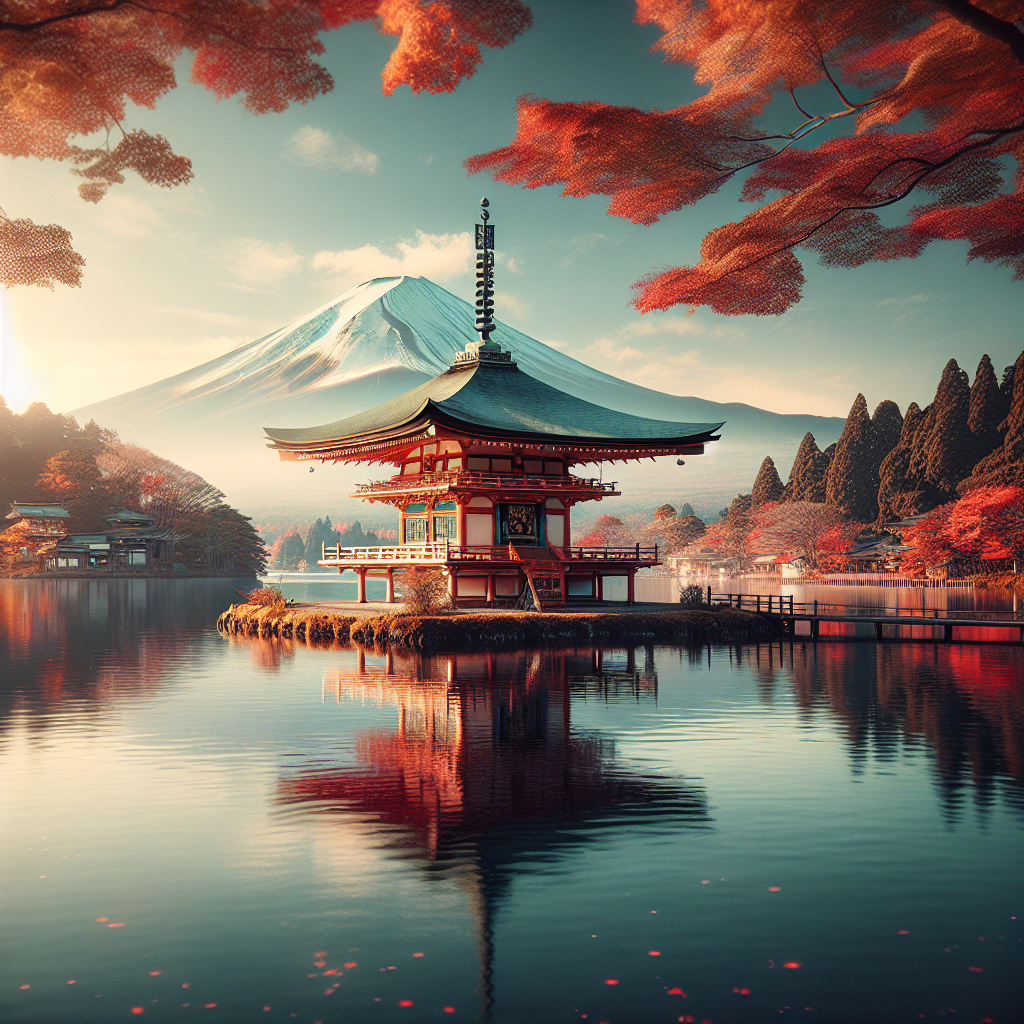

In [13]:
from IPython.display import Image
Image(filename=image_path) 

In [14]:
# Now let's generate some our avatar
model = "dall-e-3"
n = 1
size = "1024x1024"
quality = "standard"
style = "vivid"
prompt = """ 
Generate a cartoon image with the following description of myself: The image features a male with 
black hair with bangs covering most of his forehead, smiling broadly at the camera. 

I wear thick black glasses and have a dimple on the right side of my face.

I have a rather tanned Asian complex and appear to be cheerful. The individual is wearing a 
blue collar shirt with buttons. 

The photo's plain and white background accentuates the subject's features. 
The overall appearance suggests a casual or professional setting, perhaps intended for an 
identification document or a profile picture.
"""

response = client.images.generate(
    model=model,
    prompt=prompt,
    n=n,
    size=size,
    quality=quality,
    style=style
)

response

ImagesResponse(created=1729553566, data=[Image(b64_json=None, revised_prompt='Create an image of a male South Asian with a tanned complexion and black hair styled with bangs over his forehead. He is smiling broadly, revealing a dimple on his right cheek. He is wearing thick black glasses. His attire consists of a blue collared shirt with buttons, suggesting a casual or professional environment. He is posed against a plain, white background, which serves to highlight his features. The scene hints at a formal occasion, like an identification document photo or a profile picture.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-2aZNnpvzLOPAE2JYFu3pKlYc/user-IgofdTeb0p5OL4QPxoVAFfOH/img-r2B6345t1PynlY46zBIUAlDE.png?st=2024-10-21T22%3A32%3A46Z&se=2024-10-22T00%3A32%3A46Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-21T18%3A37%3A43Z&ske=2024-10-22T18%3A37%3A43Z&sks=b&skv

In [15]:
json_response = json.loads(response.model_dump_json())

In [16]:
json_response

{'created': 1729553566,
 'data': [{'b64_json': None,
   'revised_prompt': 'Create an image of a male South Asian with a tanned complexion and black hair styled with bangs over his forehead. He is smiling broadly, revealing a dimple on his right cheek. He is wearing thick black glasses. His attire consists of a blue collared shirt with buttons, suggesting a casual or professional environment. He is posed against a plain, white background, which serves to highlight his features. The scene hints at a formal occasion, like an identification document photo or a profile picture.',
   'url': 'https://oaidalleapiprodscus.blob.core.windows.net/private/org-2aZNnpvzLOPAE2JYFu3pKlYc/user-IgofdTeb0p5OL4QPxoVAFfOH/img-r2B6345t1PynlY46zBIUAlDE.png?st=2024-10-21T22%3A32%3A46Z&se=2024-10-22T00%3A32%3A46Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-10-21T18%3A37%3A43Z&ske=2024-10-22T18%3A37%3A43Z&sks=b&